# SECURITY FOR THE INTERNET OF THINGS

## <a href='https://cours-info.iut-bm.univ-fcomte.fr/pmwiki-2.2.131/pmwiki.php/MonWiki/IotChiffrementSymetriqueEn'>The One-Time Pad</a>

As we can see in the explanation the encryption and decryption take place with the same random generated noise (mask, that was generated using SystemRnadom), applying xor on the original message with the gotten mask.<br> After that the receiver on the other end applies xor on the mask and received encrypted msg.<br> That way we can get the original message. 

In [425]:
from random import SystemRandom
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
cryptogen = SystemRandom()
def symmetrical_encrypt(msg):
    mask = [cryptogen.randrange(2) for i in range(len(msg))]
    print(mask)
    encr = ""
    for i in range(len(msg)):
        res = (ord(msg[i]) - ord('0')) ^ mask[i]
        encr = encr + str(res)
    return (encr, mask)

In [426]:
(enc, mask) = symmetrical_encrypt("1011001")

[0, 1, 1, 1, 1, 0, 0]


In [427]:
def symmetrical_decrypt(encr, mask):
     decr = ""
     for i in range(len(mask)):
        res = (ord(encr[i]) - ord('0')) ^ mask[i]
        decr = decr + str(res)
     return (decr, mask)

In [428]:
(decr, tt) = symmetrical_decrypt(enc, mask)

In [429]:
print(decr)

1011001


# <a href='https://cours-info.iut-bm.univ-fcomte.fr/pmwiki-2.2.131/pmwiki.php/MonWiki/IotGenerateurAleaEn'>CONSTITUTION OF RANDOM GENERATORS</a>

## LINEAR CONGRUENTIAL GENERATORS

This generator has low complexity and is not secure enough. <br>
X<sub>n+1</sub>=(a⋅X<sub>n</sub>+c)%m  -> depends on params a, c, m 

The generator is periodic and some parameters produce better results. To obtain such parameters it is required for them to satisfy those requirements:

- c and m are coprime integers (their gcd is 1)
- For each prime number p dividing m, (a−1) is a multiple of p
- m  multiple of 4 ⇒(a−1) multiple of 4
- valid for c≠0

Based on this implementation odd and even random numbers are evenly generated. 

In [223]:
def generate_next(a, c, m, Xn):
    res = (a*Xn + c) % m
    return (a*Xn + c) % m

def generate_seq(length):
    seq = []
    ## find optimal a, c, m, seed
    (a, c, m, seed) = find_opt_params()
    seq.append(generate_next(a, c, m, seed))
    for i in range(1, length):
        seq.append(generate_next(a, c, m, seq[i-1]))
    return seq

def find_opt_params():
    m = pow(16, cryptogen.randrange(10))
    c = pow(3, cryptogen.randrange(10))
    a = 5
    seed = pow(11, cryptogen.randrange(10))
    return (a, c, m, seed)
    

In [224]:
print(generate_seq(6))

[20288, 121123, 625298, 3146173, 15750548, 11663559]


In [225]:
res = generate_seq(40)

In [231]:
print("Generated sequence: ", [x for x in res])
print("Quantity of odd and even vals: ", np.bincount([x % 2 for x in res]))

Generated sequence:  [97435858, 487179293, 2435896468, 3589547751, 767869574, 3839347873, 2016870184, 1494416331, 3177114362, 3000669925, 2118447740, 2002304111, 1421585966, 2812962537, 1179910800, 1604586707, 3727966242, 1459962029, 3004842852, 2139312375, 2106627286, 1943201841, 1126074616, 1335405787, 2382061642, 3320373621, 3716966220, 1404961919, 2729842302, 764309625, 3821548128, 1927871459, 1049422706, 952146237, 465763892, 2328819463, 3054162726, 2385911745, 3339624136, 3813218795]
Quantity of odd and even vals:  [20 20]


<BarContainer object of 2 artists>

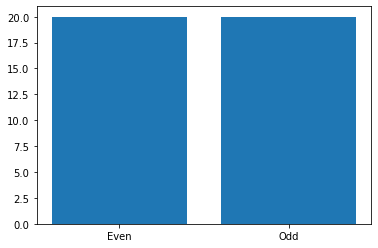

In [232]:
plt.bar(['Even', 'Odd'], np.bincount([x % 2 for x in res]))


### Integration to the one-time pad algorithm

As you can notice, before the one-time pad algorithm used **SystemRandom** to generate random mask. <br>In the integrated version the mask is generated based on the rand_n % 2 where rand_n is **member of the sequence generated with lcg**.

In [80]:
def symmetrical_encrypt_lcg(msg):
    lcg_seq = generate_seq(len(msg))
    mask = [i % 2 for i in lcg_seq]
    print("Mask: ", mask)
    encr = ""
    for i in range(len(msg)):
        res = (ord(msg[i]) - ord('0')) ^ mask[i]
        encr = encr + str(res)
    return ((encr, mask))

In [82]:
(enc, mask) = symmetrical_encrypt_lcg("1011001100111")
(decr, tt) = symmetrical_decrypt(enc, mask)
decr

Mask:  [0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]


'1011001100111'

## THE XORSHIFT

1. x ^= x >> a;

2. x ^= x << b;

3. x ^= x >> c; <br>


The value obtained after these three operations is the new term of the sequence, to be output

In [235]:
def generate_xor_shift():
    a = cryptogen.randint(1, 10) * cryptogen.randint(1, 10)
    b = cryptogen.randint(1, 10) * cryptogen.randint(1, 10)
    c = cryptogen.randint(1, 10) * cryptogen.randint(1, 10)
    return (a, b, c)
    
def simulate_xor_shift(x = cryptogen.randrange(10)):
    (a, b, c) = generate_xor_shift()
    x ^= int(x >> a);
    x ^= int(x << b);
    x ^= int(x >> c);
    x = int(x)
#    print("The result for xor: {},  The param a: {}, The param b: {}, The param c: {}".format(x, a, b, c))
    return x     

print("Xorshift result : ", simulate_xor_shift())
    
    

Xorshift result :  5106502662052193633958887428


### Time comparison between 2 algorithms

*Below you can see the results plotted based on fixed amound of generations.*

In [204]:
import time

def plot_lcg_time(times):
    x, y = [], []
    for i in range(times):
        start = time.time()
        rand = generate_seq(1)[0]
        end = time.time()

        x.append(rand)
        y.append(end - start)
    print("LCG random numbers: ", x)
    print("Average exe time: ", round(sum(y)/len(y), 7))
    plt.subplot(1, 2, 1)   
    plt.scatter(x, y, c = y)
    plt.xlabel('LCG seq')
    plt.ylabel('Time')

        
def plot_xor_time(times):
    x, y = [], []
    for i in range(times):
        start = time.time()
        rand = simulate_xor_shift()
        end = time.time()

        x.append(rand)
        y.append(end - start)
    print("XOR random numbers: ", x)
    print("Average exe time: ", round(sum(y)/len(y), 7))
    plt.subplot(1, 2, 2)   
    plt.scatter(x, y, c = y)
    plt.xlabel('XOR seq')
    plt.ylabel('Time')
    plt.tight_layout()


LCG random numbers:  [2192, 232, 8858048, 14, 606, 8, 226, 6658, 7166, 8672]
Average exe time:  0.0001266
XOR random numbers:  [9895605239817, 297, 585, 309242363913, 39582418636809, 8200, 150995529, 9663676425, 153, 5066549580791817]
Average exe time:  0.0001089


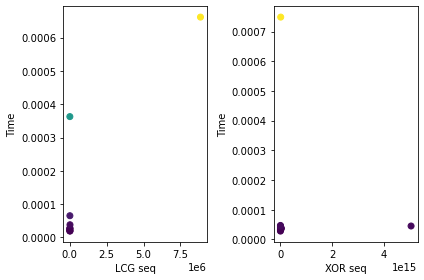

In [206]:
plot_lcg_time(10)
plot_xor_time(10)

## <a href='https://en.wikipedia.org/wiki/Linear-feedback_shift_register'>Linear-feedback shift register</a>

LFSR is a shift register whose input bit is a linear function of its previous state. 
The LFSR is maximal-length if and only if the corresponding feedback polynomial is primitive. This means that the following conditions are necessary:
- The number of taps is even.
- The set of taps is setwise co-prime; i.e., there must be no divisor other than 1 common to all taps.

Below you can see the resultat for taps = [16, 13, 10, 11]

In [430]:
def perform_shift(bit, lfsr, period, taps):
    for tap in taps:
        bit = int((lfsr >> (16 - tap)) ^ bit)
    bit = bit & 1
    lfsr = int((lfsr >> 1) | (bit << 15));
    period = period + 1
    return (period, bit, lfsr)

def linear_shift(start_state, taps):
    lfsr = start_state;
    bit = 0;                    
    period = 0;

    period, lbit, lfsr = perform_shift(bit, lfsr, period, taps)
    while lfsr != start_state:
        period, lbit, lfsr = perform_shift(bit, lfsr, period, taps)

    print("PERIOD: ", period)
    
linear_shift(22323, [16,13,10,11])

PERIOD:  16383


# <a href='https://en.wikipedia.org/wiki/Blum_Blum_Shub'>Blum Blum Shub</a>

Blum Blum Shub is a pseudorandom number generator and takes this form:
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/1973ef6f265492040ea5a1ac9cd2e1be73e2b04b">,
- M = pq is product of large prime numbers p and q.
- The seed x<sub>0</sub> is comprime to M
- p and q should be congruent to 3(mod 4)


In [454]:
from sympy import randprime, isprime 
def generate_primes(N=1000):
    while True:
        p = randprime(1, N)
        q = randprime(1, N)
        seed = randprime(1, N)
        if isprime(2*p+1) and isprime(2*q+1) and p%4 == q%4 == 3 and (seed % p == seed % q) != 0:
            return p*q, seed
def bit_parity(num):
    return sum([int(i) for i in bin(num)[2:]])%2

def blum_shub(seed=None, n=20):
    output = ""
    M, x0 = generate_primes()
    print("M: ", M, "Seed: ", x0)
    #x0 = seed if seed is not None else x0
    x = (x0**2)%M
    for i in range(n): 
        output += str(bit_parity(x))
        x = (x**2)%M
    return output

print("Result: ", blum_shub())

M:  63001 Seed:  509
Result:  00001101000110101101


## Rapid Exponentiation

1. We write e in base 2,
2. We remove the first 1 of this writing,
3. Then we replace
    - the 0 by S,
    - the 1 by SX,

We thus obtain a word made up of the letters S and X.
4. We start from the number X.
    - if the first letter is S, we raise to the square
    - otherwise, multiply by X.
5. Start again with the following letters, until the end of the word.


In [455]:
def define_word(num):
    form = "{0:b}".format(num)[1:]
    string = ""
    for i in form:
        string = string + ("SX" if i == '1' else "S")
    print(form + "  " + string)
    return string

def exp(word, X):
    res = X
    expo = [1]
    for i in word:
        res = res * (res if i == 'S' else X)
        expo.append(expo[-1] + 1 if i != 'S' else expo[-1]*2) 
    print("List of exponents: ", expo)
    return res

In [456]:
print("Result:" , exp(define_word(19), 2))

0011  SSSXSX
List of exponents:  [1, 2, 4, 8, 9, 18, 19]
Result: 524288


# Generation of prime numbers

## ERATOSTHENES' SIEVE

**To obtain a list of prime numbers below N, one can proceed as follows:**

- Create the list of integers from 2 to N,
- Delete, in this list, the multiples of 2, then the multiples of the next remaining number in the list (3), then the multiples of the next remaining number in the list (5)...
- Stop at N/2.


- By implementing those steps, the result sequence will be prime, because on each step we remove numbers that have dividers.
- Its possible to shrink iteration by going till *N/2*, because for example if we check number p, at this step, all lower multiples of p<sup>2</sup> were already eliminated for p-1, p-2, ..., etc. So we can check p<sup>2</sup>, p(p+1), p(p+2), ..., till N
- Its one of the fastest algorithms to find prime numbers in range, that can be used in IoT as well

In [480]:
from math import sqrt
def check_primes(N):
    primes = [True]*(N+1)
    p = 2
    while (p * p <= N):
        if primes[p]:
            for i in range(p ** 2, N + 1, p):
                primes[i] = False
        p += 1
    return {i: "prime" if primes[i] else "non_prime" for i in range(2, N+1) }

def get_primes(N):
    dic = check_primes(N)
    return[i for i in dic.keys() if dic[i] == "prime"]

def get_max_prime(N):
    arr = get_primes(N)
    return arr[len(arr)-1]


In [481]:
get_primes(30)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

## Small theorem of Fermat

It's possible to implement, in the sensor, a first probabilistic primality test based on Fermat in this way:

1. Start by doing some simple tests: a number with at least two digits, and ending with 0,2,4,5,6,8, for example, is not prime.
2. Then, we can integrate the test of a<sub>n</sub> ≡ a[n], to see if the number has a chance of being prime.

In [523]:
from random import randint
def gcd(a, b):
    if a < b:
        return gcd(b, a)
    elif a%b == 0:
        return b
    else:
        return gcd(a, a%b)
    
    
def fermat(prime, trials):
    while trials:
        a = randint(2, prime - 1)
        if gcd(a, prime) != 1:
            return False
        if a**(prime-1)% prime != 1:
            return False
        trials -= 1
    return True

        

In [524]:
fermat(3425483242573, 19)

False

## Miller-Rabin

$\mathbf{\text{This algorithm is a probabilistic test of primacy, based on amount of trials}}$<br>


In [532]:
def is_prime_miller_rabin(n, k):
    if n < 3:
        return True
    if not n % 2 :
        return False
    d = odd_div(n - 1)
    for i in range(k):
        if miller_test(n, d) == False:
            return False
    return True

def miller_test(n, d):
    a = randint(2, n - 2)
    x = pow(a, d) % n
    if x == 1 or x == n - 1:
        return True
    while d != n - 1:
        x = (x*x) % n
        d = d * 2
        if x == 1:
            return False
        elif x == n - 1: 
            return True
    return False

def odd_div(n):
    while n % 2 == 0:
        n = n//2
    return n

In [540]:
rand_seq = generate_seq(7)
for i in rand_seq:
    print(i, "Is prime by Miller-Rabin? ", is_prime_miller_rabin(i, 3), "| Is prime? ", isprime(i))

368 Is prime by Miller-Rabin?  False | Is prime?  False
4027 Is prime by Miller-Rabin?  True | Is prime?  True
1842 Is prime by Miller-Rabin?  False | Is prime?  False
3205 Is prime by Miller-Rabin?  False | Is prime?  False
1828 Is prime by Miller-Rabin?  False | Is prime?  False
3135 Is prime by Miller-Rabin?  False | Is prime?  False
1478 Is prime by Miller-Rabin?  False | Is prime?  False


## <a href='https://en.wikipedia.org/wiki/Solovay%E2%80%93Strassen_primality_test'>Solovay-Strassen</a>

Solovay–Strassen is a probabilistic test to determine if a number is probably prime or composite. 

<pre><b>inputs</b>: <i>n</i>, a value to test for primality
        <i>k</i>, a parameter that determines the accuracy of the test
<b>output</b>: <i>composite</i> if <i>n</i> is composite, otherwise <i>probably prime</i>

<b>repeat</b> <i>k</i> times:
    choose <i>a</i> randomly in the range [2,<i>n</i> − 1]
    <span class="nowrap"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle x\gets \left({\tfrac {a}{n}}\right)}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <mi>x</mi>
        <mo stretchy="false">←<!-- ← --></mo>
        <mrow>
          <mo>(</mo>
          <mrow class="MJX-TeXAtom-ORD">
            <mstyle displaystyle="false" scriptlevel="0">
              <mfrac>
                <mi>a</mi>
                <mi>n</mi>
              </mfrac>
            </mstyle>
          </mrow>
          <mo>)</mo>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle x\gets \left({\tfrac {a}{n}}\right)}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/61b5fb876bde925a1acd7d256d4d6f520c90c31a" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -1.005ex; width:8.896ex; height:3.176ex;" alt="{\displaystyle x\gets \left({\tfrac {a}{n}}\right)}"></span></span>
    <b>if</b> <span class="texhtml"><i>x</i>&nbsp;=&nbsp;0</span> <b>or</b> <span class="nowrap"><span class="mwe-math-element"><span class="mwe-math-mathml-inline mwe-math-mathml-a11y" style="display: none;"><math xmlns="http://www.w3.org/1998/Math/MathML" alttext="{\displaystyle a^{(n-1)/2}\not \equiv x{\pmod {n}}}">
  <semantics>
    <mrow class="MJX-TeXAtom-ORD">
      <mstyle displaystyle="true" scriptlevel="0">
        <msup>
          <mi>a</mi>
          <mrow class="MJX-TeXAtom-ORD">
            <mo stretchy="false">(</mo>
            <mi>n</mi>
            <mo>−<!-- − --></mo>
            <mn>1</mn>
            <mo stretchy="false">)</mo>
            <mrow class="MJX-TeXAtom-ORD">
              <mo>/</mo>
            </mrow>
            <mn>2</mn>
          </mrow>
        </msup>
        <mo>≢</mo>
        <mi>x</mi>
        <mrow class="MJX-TeXAtom-ORD">
          <mspace width="1em"></mspace>
          <mo stretchy="false">(</mo>
          <mi>mod</mi>
          <mspace width="0.333em"></mspace>
          <mi>n</mi>
          <mo stretchy="false">)</mo>
        </mrow>
      </mstyle>
    </mrow>
    <annotation encoding="application/x-tex">{\displaystyle a^{(n-1)/2}\not \equiv x{\pmod {n}}}</annotation>
  </semantics>
</math></span><img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/cf7c9008b99ce3af6c0842ae413aa7d7f345a201" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:22.98ex; height:3.343ex;" alt="a^{(n-1)/2}\not \equiv x{\pmod {n}}"></span></span> <b>then</b> 
        <b>return</b> <i>composite</i>
<b>return</b> <i>probably prime</i>
</pre>

In [463]:
def get_legendre(a, p):
    if a % p == 0:
        return 0
    for i in range(p):
        if i**2 == a%p:
            return 1
    return -1

def is_prime(num, k):
    while k:
        a = randint(2, num-1)
        x = get_legendre(a, num)
        if x == 0 or (a**((num-1)//2))%num != x%num:
            return False
        k = k - 1
    return True

In [464]:
is_prime(7, 15)

False

## Lucas-Lehmer

This test works for Mersenne numbers. <br>That means that the number *n* to check is **M<sub>p</sub> = 2<sup>p</sup> - 1**, where p is odd

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/4212bd376678838f4f69192f5f498bf3d03c5f67" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -2.505ex; width:28.023ex; height:6.176ex;" alt="s_{i}={\begin{cases}4&amp;{\text{if }}i=0;\\s_{i-1}^{2}-2&amp;{\text{otherwise.}}\end{cases}}">

Then M<sub>p</sub> is prime if and only if
<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/0952c8b1cba829d16b7e669761f9276f7c988aaa">

In [313]:
def is_prime_lucas_lehmer(p):
    Mp = 2**p - 1
    s = 4
    for i in range(p-2):
        s = (s**2 - 2) % Mp
    return s == 0

# Key exchange
## <a href= 'https://en.wikipedia.org/wiki/Diffie%E2%80%93Hellman_key_exchange'>Diffie–Hellman key exchange</a>

<div>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Public_key_shared_secret.svg/500px-Public_key_shared_secret.svg.png" width="300" height="300"/>
</div>

Diffie–Hellman key exchange is a method of securely exchanging cryptographic keys over a public channel and was one of the first public-key protocols.

In the simplest and the original implementation *p* is prime and *g* is a primitive root modulo *p*

Example:
<ol><li><a href="/wiki/Alice_and_Bob" title="Alice and Bob">Alice and Bob</a> publicly agree to use a modulus <i><span style="color:blue">p</span></i> = <span style="color:blue">23</span> and base <i><span style="color:blue">g</span></i> = <span style="color:blue">5</span> (which is a primitive root modulo 23).</li>
<li>Alice chooses a secret integer <i><b><span style="color:red">a</span></b></i> = 4, then sends Bob <i><span style="color:blue">A</span></i> = <i><span style="color:blue">g</span><sup><b><span style="color:red">a</span></b></sup></i> mod <i><span style="color:blue">p</span></i>
<ul><li><i><span style="color:blue">A</span></i> = <span style="color:blue">5</span><sup><b><span style="color:red">4</span></b></sup> mod <span style="color:blue">23</span> = <span style="color:blue">4</span></li></ul></li>
<li>Bob chooses a secret integer <i><b><span style="color:red">b</span></b></i> = 3, then sends Alice <i><span style="color:blue">B</span></i> = <i><span style="color:blue">g</span><sup><b><span style="color:red">b</span></b></sup></i> mod <i><span style="color:blue">p</span></i>
<ul><li><i><span style="color:blue">B</span></i> = <span style="color:blue">5</span><sup><b><span style="color:red">3</span></b></sup> mod <span style="color:blue">23</span> = <span style="color:blue">10</span></li></ul></li>
<li>Alice computes <i><b><span style="color:red">s</span></b></i> = <i><span style="color:blue">B</span><sup><b><span style="color:red">a</span></b></sup></i> mod <i><span style="color:blue">p</span></i>
<ul><li><i><b><span style="color:red">s</span></b></i> = <span style="color:blue">10</span><sup><b><span style="color:red">4</span></b></sup> mod <span style="color:blue">23</span> = <span style="color:red">18</span></li></ul></li>
<li>Bob computes <i><b><span style="color:red">s</span></b></i> = <i><span style="color:blue">A</span><sup><b><span style="color:red">b</span></b></sup></i> mod <i><span style="color:blue">p</span></i>
<ul><li><i><b><span style="color:red">s</span></b></i> = <span style="color:blue">4</span><sup><b><span style="color:red">3</span></b></sup> mod <span style="color:blue">23</span> = <span style="color:red">18</span></li></ul></li>
<li>Alice and Bob now share a secret (the number 18).</li></ol>

In [137]:
def key_exchange(p=23, g=5):
    a = randint(2, 1000)
    A = g**a % p
    b = randint(2, 1000)
    B = g**b % p
    s = B**a % p

class SecretGenerator:
    def __init__(self, p=23, g=5):
        self.p = p
        self.g = g
        
    def sendAtoB(self):
        self._a = randint(2, 1000)
        print("Alice chose: ", self._a)
        return self.g**self._a % self.p
    
    def sendBtoA(self):
        self._b = randint(2, 1000)
        print("Bob chose: ", self._b)
        return self.g**self._b % self.p
    
    def printSecret(self):
        print("Alice calculated: ", self.sendAtoB())
        print("Bob calculated: ", self.sendBtoA())

In [138]:
a = SecretGenerator()
a.printSecret()

Alice chose:  753
Alice calculated:  20
Bob chose:  181
Bob calculated:  20


# Asymmetric encryption algorithms

Asymmetric cryptography, is a cryptographic system that uses pairs of keys. Each pair consists of a public key (which may be known to others) and a private key (which may not be known by anyone except the owner). The generation of such key pairs depends on cryptographic algorithms which are based on mathematical problems termed one-way functions.

## <a href='https://en.wikipedia.org/wiki/Blum%E2%80%93Goldwasser_cryptosystem'>Blum-Goldwasser cryptosystem</a>
 


The Blum–Goldwasser (BG) cryptosystem is an asymmetric key encryption algorithm. 
The public and private keys are generated as follows:
1. Choose two large distinct prime numbers p and q such that p ≡ 3 mod 4 and q ≡ 3 mod 4
2. Compute n = pq, where n is the private key

<img src="https://i.ibb.co/gr6z8SN/bg-algo.png" alt="bg-algo" border="0" width="500" height="600">


In [508]:
import math
from bitarray import bitarray
from bitstring import BitArray
from numpy import array_split
import struct

def extended_gcd(a, b):
    old_r, r = a, b
    old_s, s = 1, 0
    old_t, t = 0, 1
    
    while r != 0:
        q = old_r // r
        old_r, r = r, old_r - q*r
        old_s, s = s, old_s - q*s
        old_t, t = t, old_t - q*t
    return (old_s, old_t, old_r)

class BlumGoldwasser:
    def __init__(self):
        pass
    def generate_key(self):
        satisfying = False
        while not satisfying:
            p = randint(20, 100)
            q = randint(20, p)
            satisfying = (p != q) and (p%4 == 3) and (q%4 == 3)
        self._p = p
        self._q = q
        print(p, q)
        return p*q
    
    def encrypt(self, M):
        n = self.generate_key()
        h = math.ceil(math.log2(math.log2(n)))
        seq = M
        self._t = round(len(M)/h)
        seq = [str(seq[i:i+h]).zfill(h) for i in range(0, len(seq), h)]
        c = []
        r = randint(2, n)
        x = r**2 % n
        
        for i in range(self._t):
            x = x**2 % n
            print("XI ", bin(x))
            print("S ", bin(2**(h+1)-1))
            p = x&((2**(h))-1)
            print("P. ", bin(p))
            j = int(str(seq[i]), 2)
            print(j^p)
            c.append(j^p)
        x = x**2 % n
        self._n = n
        return (c, x)
            
    def decrypt(self, c, x):
        h = math.ceil(math.log2(math.log2(self._n)))
        print("H  ", h)
        dp = ((self._p+1)/4)**(self._t+1)%(self._p-1)
        dq = ((self._q+1)/4)**(self._t+1)%(self._q-1)
        print(dp, "  ", dq)
        up = x**dp % self._p
        uq = x**dq % self._q
        print("UP ", up, " ", uq)
        rp, rq, rr = extended_gcd(self._p, self._q)
        print("RP ", rp,  " ", rq)
        xi = int((uq*rp*self._p + up*rq*self._q)%self._n)
        print("XO", xi)
        f = ""
        for i in range(self._t):
            xi = (xi**2)% self._n
            print("XI ", bin(xi))
            mi = xi&(2**h-1)
            print("S ", bin(mi))
            print("CI ", bin(c[i]))
            j = c[i]^mi
            print(f)
            f = f + (bin(j))[2:].zfill(h)        
        print(f)
        

## ElGamal

The ElGamal algorithm is an asymmetric cryptographic algorithm based on discrete logarithms. 

Here's how Bob can send an encrypted message to Alice (with Alice's public key)

**Publication of Alice's public key**

- Alice finds p and g, respectively a prime number and a primitive root modulo p.
- Alice chooses a from {0,...,p−2}, and calculates A=g<sup>a</sup>%p.
- Alice makes (p,g,A) public.

**Encryption by Bob**

- Bob recovers (p,g,A).
- Bob chooses b from {0,...,p−2}, and calculates B=g<sup>b</sup>%p.
- Bob encrypts the message m into the cryptogram c=(A<sup>b</sup>×m)%p.
- Bob sends (B,c).

Alice deciphers c to get m, as follows: m=(B<sup>p−1−a</sup>×c)%p


In [574]:
def prim_roots(modulo):
    coprime_set = {num for num in range(1, modulo) if gcd(num, modulo) == 1}
    return [g for g in range(1, modulo) if coprime_set == {pow(g, powers, modulo)
            for powers in range(1, modulo)}]

class ElGamal:
    def el_gama_en_Alice(self):
        self._p = randint(20, 500)
        self._g = prim_roots(self._p)
        while len(self._g) < 1:
            self._p = randint(20, 100)
            self._g = prim_roots(self._p)
        self._g = self._g[0]
        self._a = randint(0, self._p - 2)
        A = self._g**self._a%self._p
        print("Alice calculated: p =", self._p, ", g =", self._g, " A =", A)
        return (self._p, self._g, A)


    def el_gama_en_Bob(self, p, g, A, m):
        b = randint(0, p - 2)
        B = g**b%p
        c = (A**b * m)%p
        print("Bob calculated: B =", B, ", c =", c)
        return B, c

    def decipher(self, B, c):
        return ((B**(self._p-1-self._a))*c)%self._p

    def introduce_process(self, m):
        (p, q, A) = self.el_gama_en_Alice()
        B, c = self.el_gama_en_Bob(p, q, A, m)
        result = self.decipher(B, c)
        print("Result: ", bin(result)[2:])

In [575]:
el = ElGamal()
el.introduce_process(int('1011', 2))

Alice calculated: p = 33 , g = 2  A = 8
Bob calculated: B = 16 , c = 11
Result:  1011


## RSA 

**Encryption**

The procedure for encrypting a message :

1. using an agreed dictionary (ASCII...), the message is translated into a number t,
2. and then raise this number t to the power c,
3. finally, we reduce the number tc obtained modulo n: it is this number x that we send.

**The deciphering**

To decrypt a message x :

1. we raise x to the power d,
2. we reduce the number obtained modulo n: we find t,
3. it remains to translate the number into a message, using the agreed dictionary

n = P<sub>1</sub>P<sub>2</sub>, where P<sub>1</sub>, P<sub>2</sub> are prime numbers.

To find c and d we can use these steps:
1. Draw c randomly, and do (r,u,v)=bezout(c,(P1−1)(P2−1))
2. As long as r≠1, do:
     - c=c+1
     - (r,u,v)=bezout(c,(P<sub>1</sub>−1)(P<sub>2</sub>−1))

The encryption key will be the last c found, and the decryption key the last u returned, assuming they are both positive.

In [514]:
class RSA: 
    def _gen_p1_p2(self):
        p1 = 1
        p2 = 1
        while p1 == p2:
            primes_seq = get_primes(500)
            p1 = primes_seq[cryptogen.randrange(1, len(primes_seq))]
            p2 = primes_seq[cryptogen.randrange(1, len(primes_seq))]
        return (p1, p2)

    def _gen_params(self, p1, p2):
        n = p1 * p2
        c = randint(2, 50)
        u, v, r = extended_gcd(c, (p1 - 1)*(p2 - 1))        
        while r != 1:
            c += 1
            u, v, r = extended_gcd(c, (p1 - 1)*(p2 - 1))
            if u < 0:
                raise Exception("Please resimulate, because the u (d) is negative") 
        print("n: {}, c: {}, d: {}".format(n, c, u))
        return (n, c, u)
    
    def encrypt(self, msg, n, c):
        return msg**c % n
    
    def decrypt(self, x, n, d):
        x = x**d
        t = x % n
        return int(t)
    
    def simulate(self, msg):
        print("Original msg: ", msg)  
        p1, p2 = self._gen_p1_p2()
        (n, c, d) = self._gen_params(p1, p2)
        enc = self.encrypt(msg, n, c)
        print("Encryption result: ", enc)
        dec = self.decrypt(enc, n, d)
        print("Decription result: ", dec)

In [515]:
RSA().simulate(123)

Original msg:  123
n: 40363, c: 17, d: 11753
Encryption result:  27313
Decription result:  123
